<h1 style="text-align: center;">Física Computacional: Corpos em Queda Livre</h1>

---

<h2 style="text-align: center;">Cálculo Numérico: Método de Euler</h2>

---

<p style="text-align: justify;">Mesmo existindo diversos métodos analíticos para resolução de EDOs, ainda assim existem equações que se faz necessário a utilização de métodos numéricos para se obter sua resolução. Esses métodos fornecem soluções em forma de tabelas de números $(x_0,y_0),(x_1,y_1)...(x_n,y_n)$. Em um procedimento numérico, basicamente o que acontece é a substituição de um problema com variáveis contínuas por outro problema envolvendo variáveis discretas. O Método de Euler é o procedimento mais simples, mas ele mostra as dificuldades que surgem ao se resolver uma EDO numericamente. Considere um problema de valor inicial descrito pelas equações abaixo:</p>


$$
  y'=f(x,y)\\
  y(x_0)=y_0
$$

<p style="text-align: justify;">Conhecendo os valores de $x_0$ e $y_0$ é possível determinar o coeficiente angular da reta tangente a $y$ no ponto $x_0$, determinando dessa forma $y_{0}'=f(x_0,y_0)$. Conhecendo o coeficiente angular, constroi-se uma reta tangente à solução $y$ no ponto $x_0$, seguindo sobre a reta tangente até encontrar a reta $x=x_1$, determina-se o valor aproximado $y_1$ de $y$ em $x_1$. Tendo assim:</p>

$$
  y_1=y_0+y_{0}'(x_1-x_0)\\
  y_1=y_0+f(x_0,y_0)(x_1-x_0)
$$

<p style="text-align: justify;">Ao ser determinado o valor de $y_1$, calcula-se o valor aproximado do coeficiente angular da tangente, $y_{1}'=f(x_1,y_1)$, a $y$ no ponto $x_1$. Através disso encontra-se o valor de $y_2$.
</p>

$$
    y_2=y_1+f(x_1,y_1)(x_2-x_1)
$$

<div style="text-align:center;">
<img src=https://live.staticflickr.com/65535/53308128473_8f49a2d3bc_b.jpg width="50%" height="200px">
</div>

<p style="text-align: justify;">Continuando sucessivamente, chega-se a:</p>

$$
y_{n+1}=y_n+f(x_n,y_n)(x_{n+1}-x_n)
$$

<p style="text-align: justify;">Se escolher um espaçamento constante para se efetuar o cálculo, isto é, se $x_{n+1}-x_n=h$, para $n=0,1,2,...$, obtém-se a Fórmula de Euler.</p>

$$
  y_{n+1}=y_n+h\cdot f(x_n,y_n)\\
  x_{n+1}=x_{n}+h
$$

In [ ]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# definindo o método de euler
def euler(f, v0, t0, tf, n):
    h = (tf - t0) / n
    t = np.linspace(t0, tf, n+1)
    v = np.zeros(n+1)
    v[0] = v0

    for i in range(n):
        v[i+1] = v[i] + h * f(v[i])

    return t, v, h

---

<h2 style="text-align: center;">Corpos em Queda Livre: Velocidade</h2>

---

<p style="txt-align: justify;">Um dos problemas mais comuns da física é o problema dos corpos em queda livre, quando um corpo está próximo à superfície terrestre, com a resistência do ár desprezada, ele fica sob a ação de uma força constante:</p>

$$
F=mg
$$

<p style="text-align: justify;">a direção positiva do movimento considerado é para baixo, portanto a equação de movimento é:</p>

$$
m\frac{d^{2}x}{dt^{2}}=mg
$$

<p style="text-align:justify;">Incluindo os efeitos de uma resistência do ár proporcional a $v$, a força total que atuará nos corpos em queda livre será:</p>

$$
F=mg-bv
$$

<p style="text-align: justify;">A constante $b$ depende da densidade e da forma do material que forma o corpo em queda, assim como também da viscosidade do fluído em que o corpo esta imerso. Como a resistência do ár é uma força dependente da velocidade, teremos uma força do tipo $F(v)$</p>

$$
m\frac{dv}{dt}=mg-bv
$$

<p style="text-align: center">Tomando $v_{0}=0$ em $t=0$, a solução analítica desse problema pode ser encontrado atraves do seguinte método:</p>

$$
\int_{0}^{v}\frac{dv}{v+(mg/b)}=-\frac{bt}{m}
$$

<p style="text-align: justify;">Aplicando o método a nossa equação de movimento, encontramos uma solução do tipo:</p>

$$
v=\frac{mg}{b}(1-e^{-bt/m})
$$

---

<h3 style="text-align: center">Corpos em Queda Livre: Solução Numérica</h3>

---

<p style="text-align: justify;">Já conheceindo a equação de movimento dos corpos em queda livre é possível determinar uma Equação Diferencial Ordinária (EDO) que determinará a solução para o problema, a equação para o caso da velocidade dos corpos em queda livre será:</p>

$$
v'-g+\frac{b}{m}v=0
$$

In [ ]:
# definindo as constantes e as funções
m = 80.0
g = 9.80
b = 0.47

def fv(v):
    return g - (b * v) / m

def fvr(t):
    return (m*g/b)*(1-np.exp(-t*b/m))

In [ ]:
# gerar uma tabela com a biblioteca panda
t, v, h = euler(fv, 0.0, 0.0, 1000, 2000)
real_v = fvr(t)

data = {'v real': real_v, 'Euler': v, 'h': h, 'erro': abs(v-real_v)}
pd.DataFrame(data).head(10)

,v real,Euler,h,erro
0,0.000000,0.000000,0.5,0.000000
1,4.892810,4.900000,0.5,0.007190
2,9.771269,9.785606,0.5,0.014337
3,14.635418,14.656861,0.5,0.021443
4,19.485300,19.513807,0.5,0.028507
5,24.320956,24.356485,0.5,0.035529
6,29.142428,29.184938,0.5,0.042510
7,33.949758,33.999207,0.5,0.049449
8,38.742987,38.799334,0.5,0.056347
9,43.522157,43.585361,0.5,0.063204


---

<h3 style="text-align: center;">Corpos em Queda Livre: Velocidade Terminal</h3>

---

<p style="text-align: justify">Ao analisar a solução analítica para o problema dos corpos em queda livre, pode-se perceber que quando $t \rightarrow \infty$, a velocidade tenderá a $v=mg/b$. reescrevendo a expressão ficará mais fácil de visualizar isso:</p>

$$
v=\frac{mg}{b} - \frac{mg}{b}\cdot\frac{1}{e^{bt/m}}
$$

<p style="text-align: justify;">Aplicando o limite na expressão acima, temos:</p>

$$
\lim_{t\rightarrow\infty}\frac{mg}{b} - \frac{mg}{b}\cdot\frac{1}{e^{bt/m}}=\frac{mg}{b}
$$

<p style="text-align: justify;">A velocidade $mg/b$ é chamada de velocidade terminal, e um corpo alcança essa velocidade quando as forças gravitacionais e de resistência de ár se equilibram.

In [ ]:
# verificando a velocidade limite
vl=[g*m/b]*len(t)

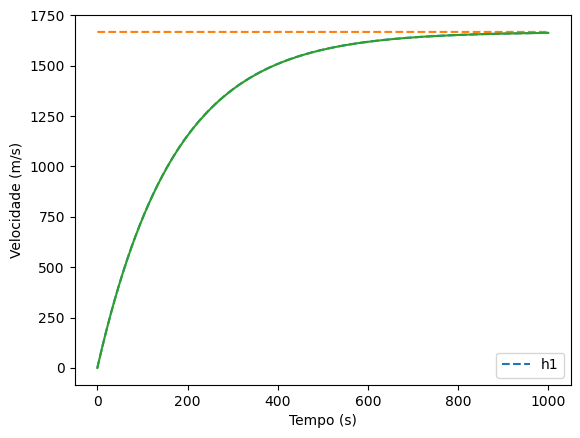

In [ ]:
# gerar um gráfico com a biblioteca matplotlib
plt.plot(t, v,'--',label='h1')
plt.plot(t, vl, '--')
plt.plot(t, real_v)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()
plt.show()

***

In [ ]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# definindo as funções e suas constantes
m = 80.0
g = 9.80
b = 0.47

def fv(v, t, b, g, m):
    return g - (b * v) / m

def v(t):
    return (m*g/b)*(1-np.exp(-t*b/m))

In [ ]:
# chamando a função odeint
t = np.linspace(0, 1000, 2000)
v0 = 0.0

sol = odeint(fv, v0, t, args=(b, g, m))
v_ = v(t)

In [ ]:
# criando tabela de dados
data_1 = {'v real': sol, 'Euler': v_, 'erro': abs(sol-v_)}
pd.DataFrame(data).head(10)

,v real,Euler,h,erro
0,0.000000,0.000000,0.5,0.000000
1,4.892810,4.900000,0.5,0.007190
2,9.771269,9.785606,0.5,0.014337
3,14.635418,14.656861,0.5,0.021443
4,19.485300,19.513807,0.5,0.028507
5,24.320956,24.356485,0.5,0.035529
6,29.142428,29.184938,0.5,0.042510
7,33.949758,33.999207,0.5,0.049449
8,38.742987,38.799334,0.5,0.056347
9,43.522157,43.585361,0.5,0.063204


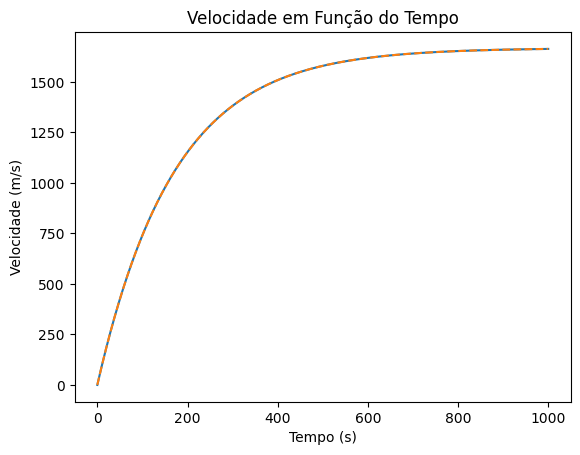

In [ ]:
# plotando o gráfico
plt.plot(t,v_,label='result. real')

plt.plot(t, sol, '--')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade em Função do Tempo')
plt.show()